# Регрессия
Предсказание цены дома по его размерам(dim_1, dim_2)

In [2]:
import os

import numpy as np
import pandas as pd # для работы с данными

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [26]:
# загружаем данные
houses = pd.read_csv("../../../Data/sb/1.4_houses.csv")
# показываем 7 первых строк(объектов)
houses.head(7)
# dim_1 & dim_2 данные необходимимые для рассчета площади дома

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


На графике наблюдаем зависимость цены дома от его размеров.
Чем больше размер дома, тем больше его цена.

f(x) = kx + b or a1*x + a0 <br>
price = price(dim_1) = a1 * dim_1 + a0

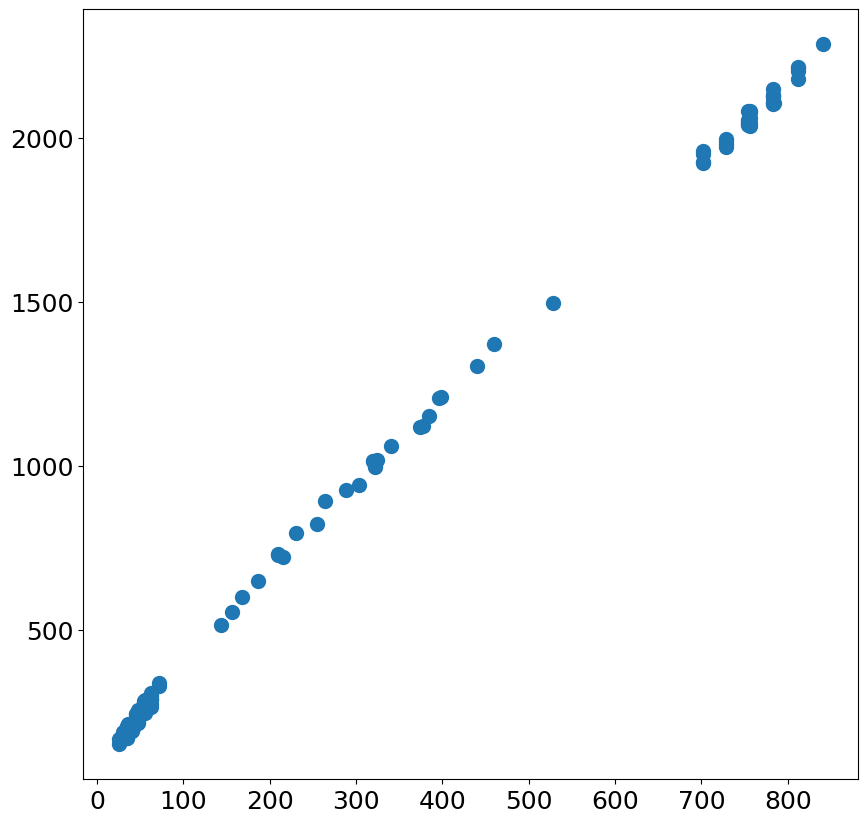

In [ ]:
fig = plt.figure(figsize=(10, 10)) #create image
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"]*houses["dim_2"], houses["price"], s=100)

# show image
plt.show()

In [ ]:
# выгружаем признаки в отдельные переменные
X = houses[["dim_1"]]
y = houses["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [ ]:
# вытаскиваем нужные коэффициенты
# на сколько предсказанный ответ возрастает при x+1, 
# т.е. при x=0 predict=a(-351.68...)
# при x=1 predict=a0+[a1](-351.68+83)=-268.59...  etc
a1 = reg.coef_ 
a0 = reg.intercept_ # покажет это значение при x = 0, т.е dim_1 = 0
print(f"a1 = {a1}")
print(f"a0 = {a0}")

# создаем ф-н для пресказания цены дома
def reg_prediction(dim_1):
    return a1 * dim_1 + a0

a1 = [83.08870109]
a0 = -351.6846978467231


In [ ]:
reg_prediction(X.dim_1[0])[0]

2057.887633711507

In [ ]:
# используем встроенные методы для рассчета предсказаний за место reg_prediction
reg.predict(X[0:1])[0]

2057.887633711507

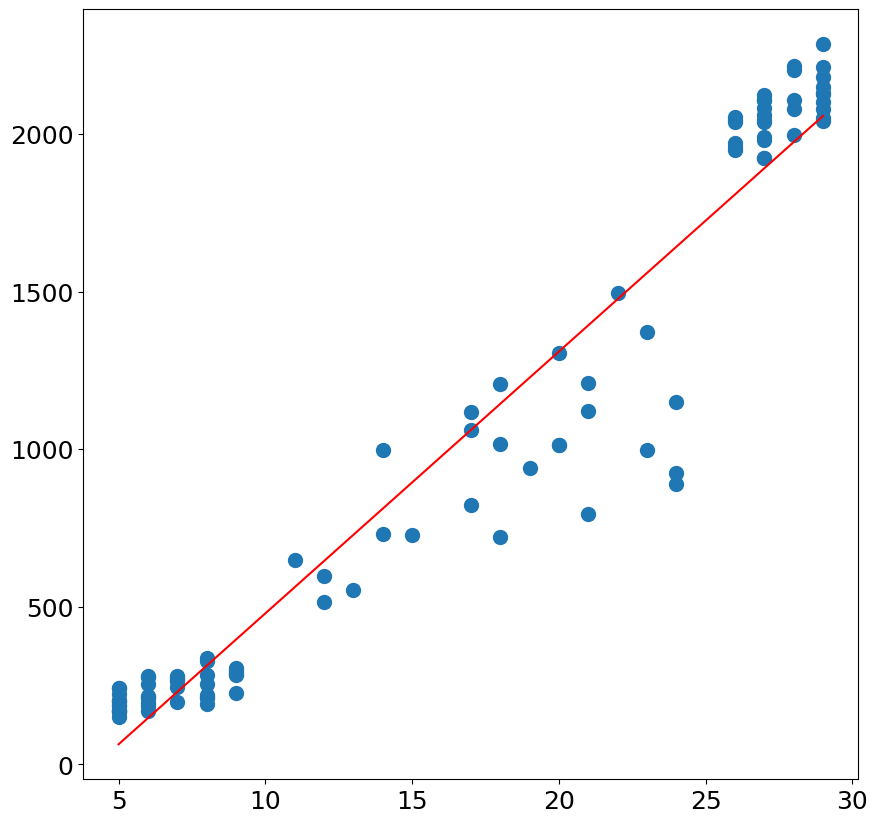

In [ ]:
# Посмотрим как выглядит функция на графике после обучения
fig = plt.figure(figsize=(10, 10)) #create image
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)

# помещаем предсказания
ax.plot(
    [X.dim_1.min(), X.dim_1.max()], 
    [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())],
    c="r")

# show image
plt.show()

Больше признаков богу признаков!

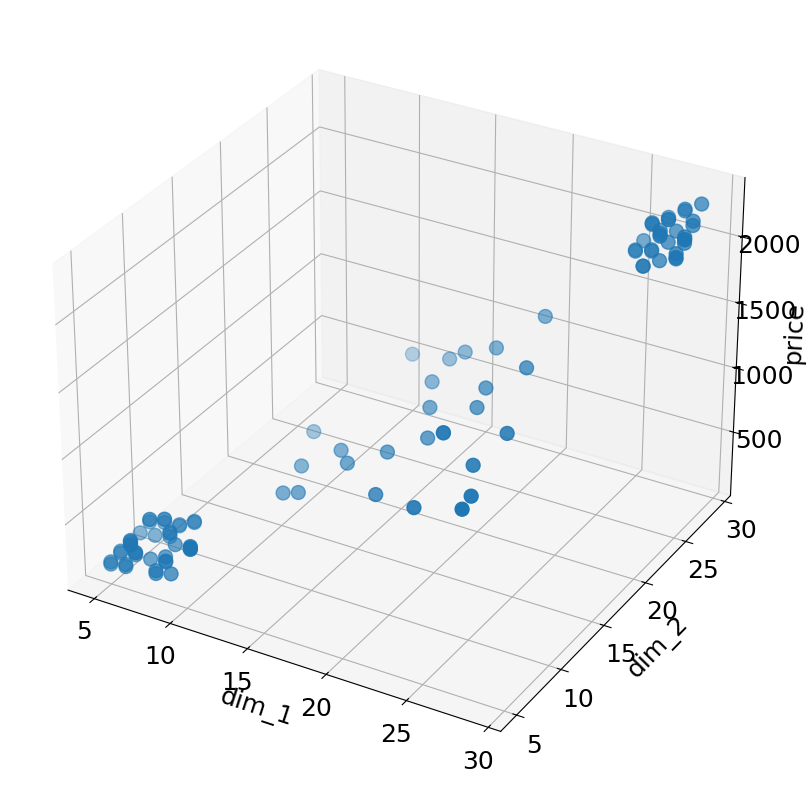

In [ ]:
fig = plt.figure(figsize=(10, 10)) #создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# обзываем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

# show image
plt.show()

In [ ]:
# добавляем 2-й признак(dim_2)
X = houses[["dim_1", "dim_2"]]
y = houses["price"]

reg = LinearRegression().fit(X, y)

In [ ]:
[a1, a2] = reg.coef_
a0 = reg.intercept_
print(f"a1, a2 = {[a1, a2]}")
print(f"a0 = {a0}")

def reg_prediction(dim_1, dim_2):
    return a1*dim_1 + a2*dim_2 + a0

a1, a2 = [34.38095466195215, 53.545295462998524]
a0 = -415.4923663649213


In [ ]:
reg_prediction(X.dim_1[0], X.dim_2[0])

2080.82359179565

In [ ]:
reg.predict(X[0:1])[0]

2080.82359179565

In [ ]:
# сделаем предсказание для различных конфигураций домов
houses_1, houses_2 = list(), list()

for x_1 in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for x_2 in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        houses_1.append(x_1)
        houses_2.append(x_2)

houses_1 = np.array(houses_1).reshape(-1, 1)        
houses_2 = np.array(houses_2).reshape(-1, 1)

p = reg.predict(np.concatenate([houses_1, houses_2], axis=1))

c:\git\Learning_ML\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


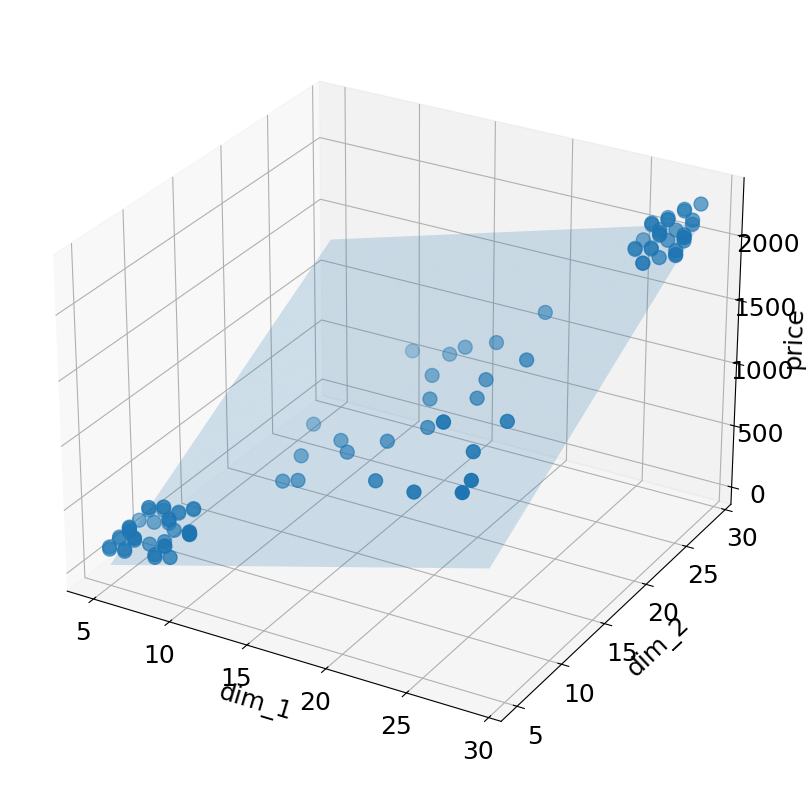

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(houses_1.ravel(), houses_2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

# изменяем позицию камеры и рисуем картинку
ax.elev = 27
plt.show()